In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

from PIL import Image
from tensorflow import keras
from src.utils import preprocess_image, init_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [156]:
import warnings
warnings.filterwarnings('ignore')
print("Warnings ignored!!")

Warnings ignored!!


In [145]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 8

In [5]:
data_path = os.path.join(os.getcwd(), 'data')
train_path = os.path.join(data_path, 'train')
valid_path = os.path.join(data_path, 'valid')
test_path = os.path.join(data_path, 'test')

In [147]:
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [148]:
train_generator = data_generator.flow_from_directory(train_path, 
                                                     target_size=IMAGE_SIZE, 
                                                     batch_size=BATCH_SIZE, 
                                                     class_mode='categorical')

valid_generator = data_generator.flow_from_directory(valid_path, 
                                                     target_size=IMAGE_SIZE, 
                                                     batch_size=BATCH_SIZE, 
                                                     class_mode='categorical')

Found 300 images belonging to 2 classes.
Found 104 images belonging to 2 classes.


In [153]:
image.shape

(224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


smiling


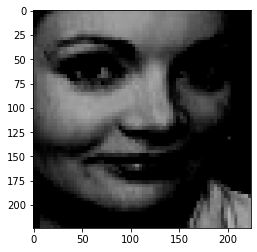

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


smiling


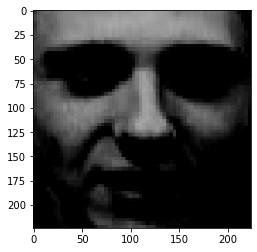

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


smiling


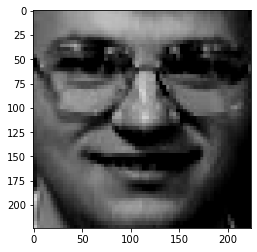

In [167]:
x,y = train_generator.next()
labels = ('not smiling', 'smiling')
for i in range(0,3):
    vis_images = x[i]
    label = labels[np.argmax(y[i])]
    print (label)
    plt.imshow(vis_images)
    plt.show()

In [221]:
#base_model = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
pred_layer = tf.keras.layers.Dense(2, activation='softmax')
model = tf.keras.Sequential()

model.add(base_model)
model.add(global_average_layer)
model.add(pred_layer)
#Freeze the resnet layer
model.layers[0].trainable = False
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-3), 
              loss='categorical_crossentropy',
              metrics= ['accuracy']
             )

In [222]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_9 ( (None, 1280)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [226]:
train_steps = len(train_generator)
valid_steps = len(valid_generator)
model_save_path = os.path.join(data_path, 'models', 'tf_mobilenetv2.h5')
early_stop = EarlyStopping(monitor= 'val_loss', 
                           patience = 7)
model_checkpoint = ModelCheckpoint(filepath=model_save_path, 
                                   monitor='val_loss', 
                                   save_best_only=True)

In [227]:
fit_history = model.fit_generator(
              train_generator,
              steps_per_epoch=train_steps,
              epochs = 15,
              validation_data=valid_generator,
              validation_steps=valid_steps, 
              callbacks=[model_checkpoint, 
                         early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 38 steps, validate for 13 steps
Epoch 1/15
38/38 [==============================] - 21s 542ms/step - loss: 0.7134 - accuracy: 0.5700 - val_loss: 0.7505 - val_accuracy: 0.5481
Epoch 2/15
38/38 [==============================] - 20s 539ms/step - loss: 0.5374 - accuracy: 0.7433 - val_loss: 0.6644 - val_accuracy: 0.6250
Epoch 3/15
38/38 [==============================] - 19s 511ms/step - loss: 0.4843 - accuracy: 0.7767 - val_loss: 0.5296 - val_accuracy: 0.6923
Epoch 4/15
38/38 [==============================] - 19s 503ms/step - loss: 0.4129 - accuracy: 0.8133 - val_loss: 0.8027 - val_accuracy: 0.5962
Epoch 5/15
38/38 [==============================] - 19s 505ms/step - loss: 0.3715 - accuracy: 0.8467 - val_loss: 0.5843 - val_accuracy: 0.6923
Epoch 6/15
38/38 [==============================] - 20s 517ms/step - loss: 0.3476 - accuracy: 0.8600 - val_loss: 0.7198 - val_accuracy: 0.6250
Epoch 7/15
38/38 [==============================] 

In [6]:
test_img_path = test_path

In [7]:
img_ext = ('png', 'jpg', 'jpeg', 'tiff', 'bmp', 'gif')
test_img_list = [os.path.join(test_img_path, img) for img in os.listdir(test_img_path) if img.endswith(('png', 'jpg', 'jpeg', 'tiff', 'bmp', 'gif'))]
test_img_list

['C:\\Users\\nzahi\\PycharmProjects\\smile_detector\\smile_detector\\data\\test\\nosmile11.jpg',
 'C:\\Users\\nzahi\\PycharmProjects\\smile_detector\\smile_detector\\data\\test\\nosmile12.jpg',
 'C:\\Users\\nzahi\\PycharmProjects\\smile_detector\\smile_detector\\data\\test\\nosmile13.jpg',
 'C:\\Users\\nzahi\\PycharmProjects\\smile_detector\\smile_detector\\data\\test\\nosmile14.jpg',
 'C:\\Users\\nzahi\\PycharmProjects\\smile_detector\\smile_detector\\data\\test\\nosmile15.jpg',
 'C:\\Users\\nzahi\\PycharmProjects\\smile_detector\\smile_detector\\data\\test\\nosmile16.jpg',
 'C:\\Users\\nzahi\\PycharmProjects\\smile_detector\\smile_detector\\data\\test\\nosmile17.jpg',
 'C:\\Users\\nzahi\\PycharmProjects\\smile_detector\\smile_detector\\data\\test\\nosmile18.jpg',
 'C:\\Users\\nzahi\\PycharmProjects\\smile_detector\\smile_detector\\data\\test\\nosmile19.jpg',
 'C:\\Users\\nzahi\\PycharmProjects\\smile_detector\\smile_detector\\data\\test\\nosmile20.jpg',
 'C:\\Users\\nzahi\\PycharmPro

In [8]:
# def preprocess_image(filepath):
#     im = image.load_img(filepath, target_size=IMAGE_SIZE)
#     im_arr = np.array(im)
#     im.close()
#     pre_process_img = preprocess_input(im_arr)
#     pre_process_img = np.expand_dims(pre_process_img, axis=0)
#     return pre_process_img

# def init_model(model, model_path):
#     """Loads a model using keras load model using input file_path"""
#     model.load_weights(model_path)
#     return model

In [12]:
test_images = {}
for img in test_img_list:
    test_img = preprocess_image(img)
    test_images[img] = test_img

In [14]:
preds = []
actual = []
test_labels = {'n': 0, 's': 1}
model_path = os.path.join(data_path, 'models', 'tf_mobilenetv2.h5')

test_model = tf.keras.models.load_model(model_path)
for img_name, imgtest_img in test_images.items():
    pred = test_model.predict_classes(test_img)
    actual.append(test_labels[os.path.basename(img_name)[0]])
    preds.append(*pred)
    

In [15]:
accuracy = sum(np.equal(preds, actual))/ len(preds)
accuracy

0.5